# Proyek Predictive Analytics: [Flood Prediction Dataset](https://www.kaggle.com/datasets/naiyakhalid/flood-prediction-dataset)
- **Nama:** Nafa Khairunnisa
- **Email:** nkhairunn2412@gmail.com
- **ID Dicoding:** nafa-khairunnisa

## Import Libraries

In [ ]:
!pip install scikeras

In [ ]:
# Library yang sering digunakan
import os
import shutil
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
# Libraries untuk pembangunan model
import tensorflow as tf
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU, Dropout
from tensorflow.keras.activations import relu, tanh
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

## Data Loading

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Cek apakah file tersedia
!ls /content/drive/MyDrive/kaggle/

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Membuat folder .kaggle
os.makedirs("/root/.kaggle", exist_ok=True)

# Memindahkan kaggle.json dari folder di Google Drive ke folder .kaggle
shutil.move('/content/drive/MyDrive/kaggle/kaggle.json', '/root/.kaggle/kaggle.json')

# Mengubah permission agar hanya bisa dibaca oleh user
os.chmod('/root/.kaggle/kaggle.json', 600)

In [ ]:
# Download dataset dari Kaggle
!kaggle datasets download -d naiyakhalid/flood-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/naiyakhalid/flood-prediction-dataset
License(s): Attribution 4.0 International (CC BY 4.0)


In [ ]:
# Unzip file dataset
!unzip flood-prediction-dataset.zip

Archive:  flood-prediction-dataset.zip
  inflating: flood.csv               


In [ ]:
# Load the dataset
flood_df = pd.read_csv('/content/flood.csv')
flood_df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


## Data Understanding dengan Exploratory Data Analysis (EDA)

### Deskripsi Variabel

In [ ]:
flood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

**Insights**:

- Dataset yang digunakan memiliki 21 kolom yang diantaranya 20 fitur dan 1 label target.
- Label target yaitu FloodProbability.
- Semua fitur memiliki tipe data integer, sedangkan label target memiliki tipe data float64.
- Jumlah data keseluruhan ada 50000 sampel dan tidak ada nilai NaN.

In [ ]:
flood_df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


**Insights**:
- Mean semua variabel sekitar 5.
- Standar deviasi sekitar 2.2-an.
- Semua fitur dalam skala yang hampir sama, termasuk FloodProbability (range 0.285–0.725).

In [ ]:
flood_df.loc[(flood_df['MonsoonIntensity']==0)]

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
223,0,4,3,2,9,3,5,7,4,10,...,6,5,3,4,4,5,9,6,6,0.510
302,0,9,3,6,8,6,4,2,7,4,...,3,9,7,3,2,3,9,3,6,0.480
605,0,5,7,6,4,6,8,5,6,4,...,6,4,4,1,6,5,3,3,8,0.485
1234,0,2,3,7,3,2,6,8,1,1,...,5,8,7,4,7,4,4,1,8,0.420
1244,0,2,6,3,2,4,2,7,4,3,...,7,4,5,5,2,3,4,5,3,0.380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49281,0,3,5,3,7,6,4,2,2,3,...,4,1,4,9,7,4,6,5,5,0.430
49377,0,6,5,6,5,9,7,5,6,3,...,5,5,2,6,2,3,2,7,3,0.480
49423,0,5,3,3,12,8,3,9,4,7,...,6,5,3,7,2,7,3,7,2,0.520
49467,0,9,3,7,6,9,8,7,3,4,...,3,13,2,6,3,7,6,2,3,0.530


**Insights**:

- Berdasarkan salah satu fitur (MonsoonIntensity), tidak ada baris di mana semua fitur bernilai 0 secara bersamaan. Artinya, tidak ada data yang perlu dihapus.

### Cek missing value

In [ ]:
flood_df.isna().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


### Cek duplikasi data

In [ ]:
flood_df.duplicated().sum()

np.int64(0)

### Cek outliers

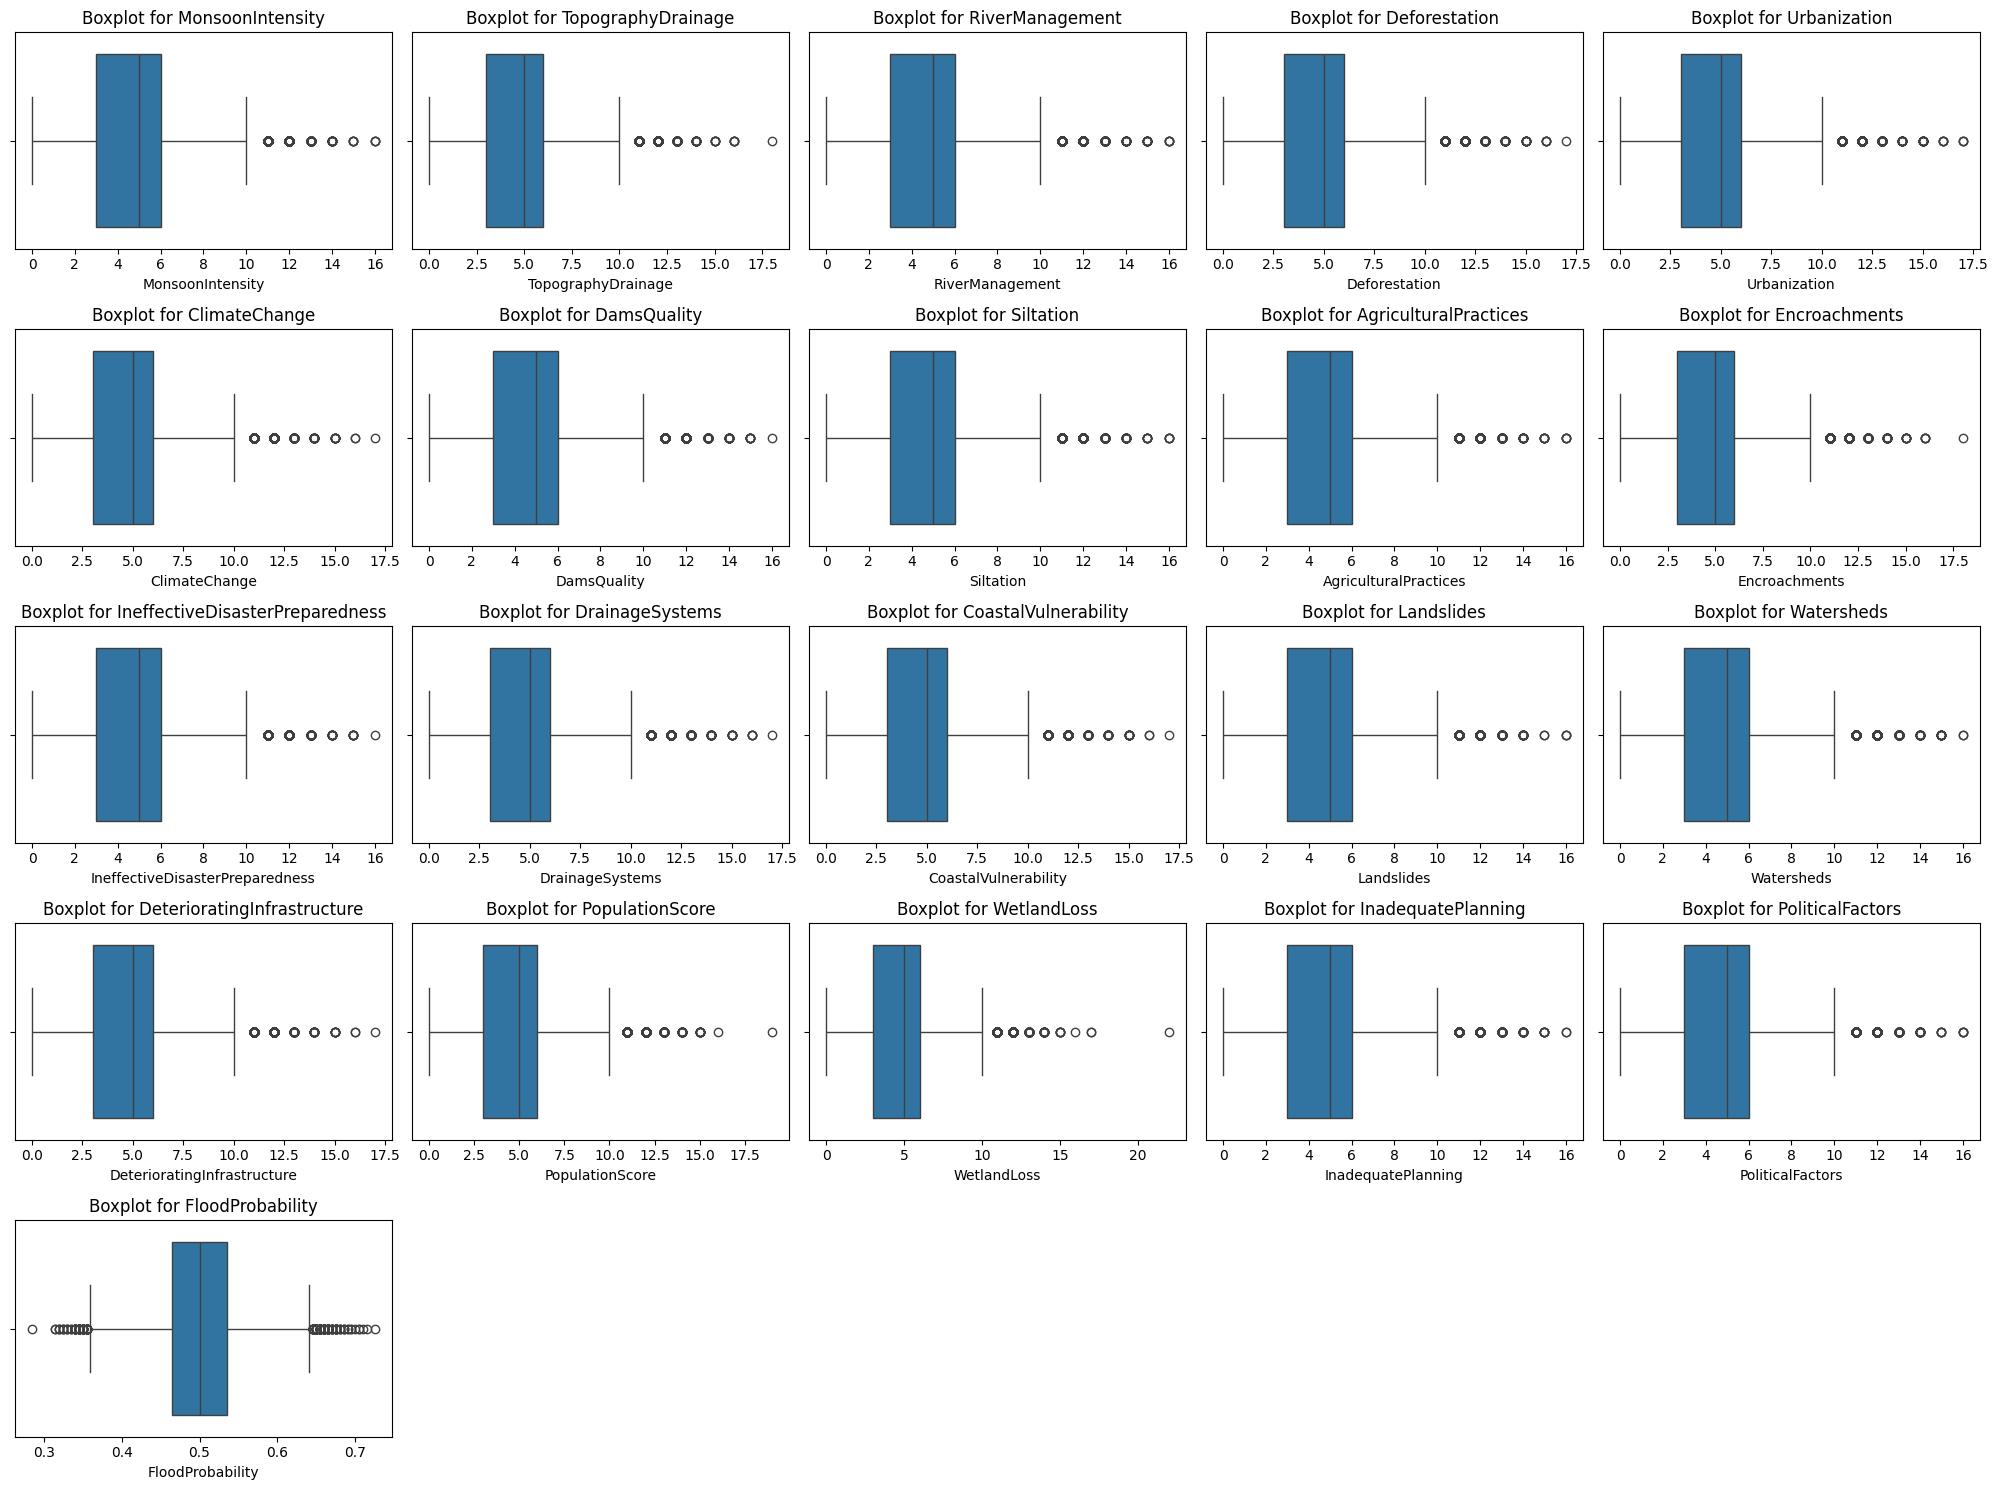

In [ ]:
# Membuat boxplot untuk setiap fitur numerik
plt.figure(figsize=(20, 15))
for i, feature in enumerate(flood_df, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(data=flood_df, x=feature)
    plt.title(f'Boxplot for {feature}')

plt.tight_layout()
plt.show()

**Insights**:

- Berdasarkan boxplot tersebut, tiap variabel memiliki outliers yang bervariasi.
- Beberapa variabel yang memiliki outliers ekstrem yaitu TopographyDrainage, Encroachments, WetlandLoss, dan PopulationScore.
- Outliers label target (FloodProbability) memiliki distribusi yang cukup sempit (sekitar 0.3–0.65) tanpa outlier ekstrem.

### Univariate analysis

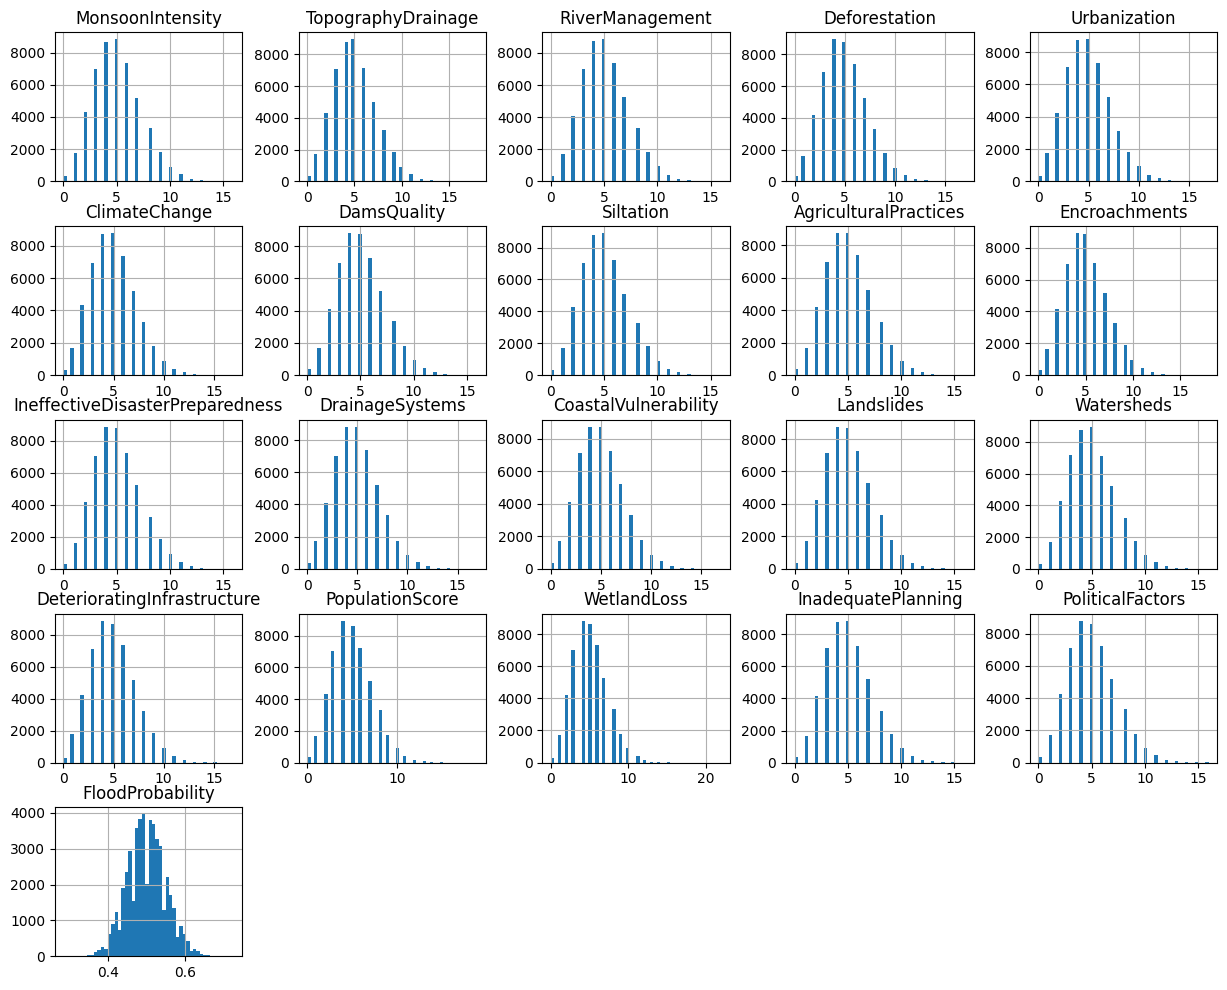

In [ ]:
flood_df.hist(bins=50, figsize=(15,12))
plt.show()

**Insights**:

- Mayoritas fitur punya distribusi condong kanan (right-skewed).
- Sebagian fitur terdistribusi normal.
- Skor target berkisar antara 0.3 sampai 0.7.
- Ada dua puncak (peaks), artinya kemungkinan besar dataset ini memiliki dua kelompok besar dalam data.

### Multivariate analysis

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

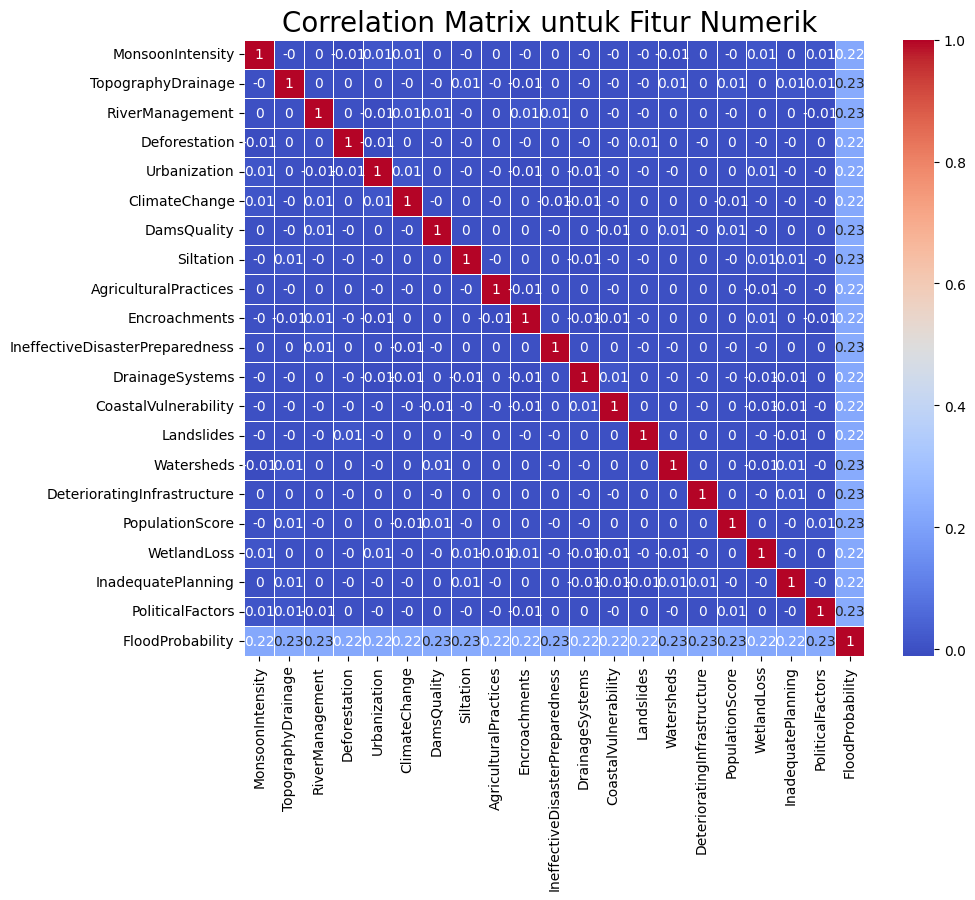

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = flood_df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

**Insights**:

- Semua fitur korelasi positif lemah terhadap label target (FloodProbability) di kisaran 0.22 - 0.23. Artinya, semua fitur relevan dalam konteks ini karena kontribusinya terhadap FloodProbability cenderung merata.
- Korelasi antar fitur juga sangat rendah yang artinya tidak terjadi multikolinearitas tinggi.

## Data Preparation

### Normalisasi

In [ ]:
# Memisahkan kolom fitur dan target
X = flood_df.drop(columns=['FloodProbability'])  # fitur
y = flood_df['FloodProbability']  # target

In [ ]:
# Scaling memakai RobustScaler
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Menangani outliers

In [ ]:
# Penanganan outliers
# Winsorizing (clipping outlier ke persentil 1% dan 99%)
for col in X_scaled.columns:
    lower = X_scaled[col].quantile(0.01)
    upper = X_scaled[col].quantile(0.99)
    X_scaled[col] = X_scaled[col].clip(lower, upper)

# Menyimpan data hasil
X_ready = X_scaled.copy()

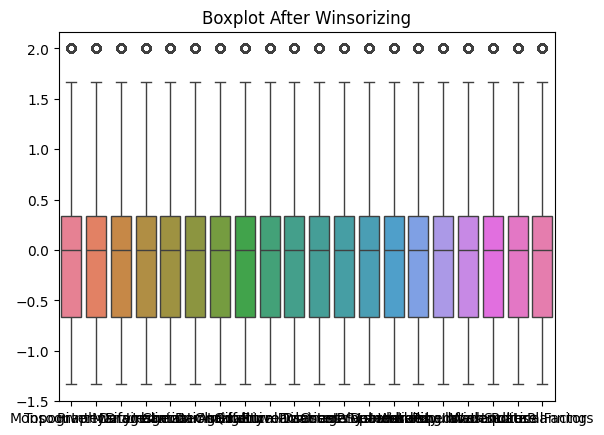

In [ ]:
# Cek setelah penanganan outliers
sns.boxplot(data=X_ready)
plt.title("Boxplot After Winsorizing")
plt.show()

**Insights**:

- Berdasarkan boxplot tersebut, terdapat outliers yang tersisa tetapi masih dalam batas winsor.

### Feature Engineering

In [ ]:
# Menggabungkan fitur hasil penanganan outliers dan label target
df_gabungan = pd.concat([X_ready, y], axis=1)

In [ ]:
# Menyalin isi df_gabungan ke df baru
df_preparation = df_gabungan.copy()

In [ ]:
# Menggabungkan beberapa fitur menjadi satu dengan penjumlahan dan dibagi 2 (Agar nilainya agar tetap berada dalam skala yang sebanding dengan fitur-fitur aslinya.)
df_preparation['KeseluruhanKapasitasDrainase'] = (df_preparation['TopographyDrainage'] + df_preparation['DrainageSystems']) / 2

df_preparation['PengelolaanEndapanSungai'] = (df_preparation['Siltation'] + df_preparation['RiverManagement']) / 2

df_preparation['PengaruhBanjirPerkotaan'] = (df_preparation['PopulationScore'] + df_preparation['WetlandLoss']) / 2

df_preparation['DegradasiLahan'] = (df_preparation['Deforestation'] + df_preparation['AgriculturalPractices']) / 2

df_preparation['PengaruhIklimMuson'] = (df_preparation['MonsoonIntensity'] + df_preparation['ClimateChange']) / 2

df_preparation['RisikoUrbanisasiDanPendudukanLahan'] = (df_preparation['Urbanization'] + df_preparation['Encroachments']) / 2

df_preparation['DampakTataKelola'] = (df_preparation['IneffectiveDisasterPreparedness'] + df_preparation['PoliticalFactors']) / 2

df_preparation['KesiapanPerencanaanBencana'] = (df_preparation['InadequatePlanning'] + df_preparation['PoliticalFactors']) / 2

df_preparation['KualitasInfrastruktur'] = (df_preparation['DeterioratingInfrastructure'] + df_preparation['DrainageSystems']) / 2

df_preparation['RisikoWilayahPesisir'] = (df_preparation['CoastalVulnerability'] + df_preparation['WetlandLoss']) / 2

df_preparation['RisikoKemiringanDanAliranAir'] = (df_preparation['Landslides'] + df_preparation['Watersheds']) / 2

# Mengubah nama kolom DamsQuality dan FloodProbability ke dalam bahasa Indonesia
df_preparation.rename(columns={'DamsQuality': 'KualitasBendungan',
                   'FloodProbability': 'ProbabilitasBanjir'
                   }, inplace=True)

### Train-Test-Split

Mengingat dataset yang memiliki total 50000 sampel, untuk pembagian data ini akan diambil sebanyak 10% saja untuk data testing. Jadi, pembagian datanya yaitu 90% untuk training data dan 10% untuk testing data.

In [ ]:
# Memisahkan kolom fitur dan target
X = df_preparation.drop(columns=['ProbabilitasBanjir'])  # fitur
y = df_preparation['ProbabilitasBanjir']  # target

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 50000
Total # of sample in train dataset: 45000
Total # of sample in test dataset: 5000


## Modeling

### Linear Regression

In [ ]:
# Inisialisasi model Linear Regression
lr_model = LinearRegression()

# Training model Linear Regression
lr_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_lr = lr_model.predict(X_test)

### Gradient Booster (GBR)

In [ ]:
# Inisialisasi model Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Training model Gradient Boosting
gb_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_gb = gb_model.predict(X_test)

### Artifical Neural Networks (ANN)

In [ ]:
# Fungsi untuk membangun model ANN
def build_ann(activation_function='relu'):
    ann_model = Sequential()
    ann_model.add(Input(shape=(X_train.shape[1],)))  # Input layer 1 hidden  layer

    # Menambahkan hidden layer dengan fungsi aktivasi yang ditentukan
    if activation_function == 'leaky_relu':
        ann_model.add(Dense(10))  # 10 neuron
        ann_model.add(LeakyReLU(negative_slope=0.01))
    else:
        ann_model.add(Dense(10, activation=activation_function))  # Fungsi aktivasi sesuai parameter

    ann_model.add(Dropout(0.3))  # Dropout layer untuk menghindari overfitting

    ann_model.add(Dense(1, activation='linear'))  # Output layer dengan linear activation untuk regresi
    ann_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
    return ann_model

In [ ]:
# Fungsi aktivasi yang akan diuji
activation_functions = ['relu', 'tanh', 'leaky_relu']

results = {}

for activation in activation_functions:
    print(f"Training model dengan activation function: {activation}")

    # Membangun model menggunakan fungsi build_ann
    ann_model = KerasRegressor(model=build_ann, activation_function=activation, epochs=10, batch_size=32, verbose=0)

    # Melakukan training
    ann_model.fit(X_train, y_train)

    # Prediksi pada data test
    y_pred = ann_model.predict(X_test)

Training model dengan activation function: relu
Training model dengan activation function: tanh
Training model dengan activation function: leaky_relu


## Evaluasi Model

### MSE, RMSE, dan R²

In [ ]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print("  MSE:", mse_lr)
print("  RMSE:", rmse_lr)
print("  R2 :", r2_lr)

Linear Regression:
  MSE: 1.1174258396696636e-05
  RMSE: 0.00334279200619731
  R2 : 0.9954898057409334


In [ ]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Boosting:")
print("  MSE:", mse_gb)
print("  RMSE:", rmse_gb)
print("  R2 :", r2_gb)

Boosting:
  MSE: 0.0002407648610980565
  RMSE: 0.015516599533984774
  R2 : 0.9028216230769782


In [ ]:
# Evaluasi model
print("Hasil Evaluasi untuk Semua Fungsi Aktivasi:")
for activation in activation_functions:
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Menyimpan hasil evaluasi
    results[activation] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

    print(f"Model dengan {activation} - MSE: {mse}, RMSE: {rmse}, R²: {r2}")

Hasil Evaluasi untuk Semua Fungsi Aktivasi:
Model dengan relu - MSE: 0.0003680268540561798, RMSE: 0.019184026012705982, R²: 0.851455680957116
Model dengan tanh - MSE: 0.0003680268540561798, RMSE: 0.019184026012705982, R²: 0.851455680957116
Model dengan leaky_relu - MSE: 0.0003680268540561798, RMSE: 0.019184026012705982, R²: 0.851455680957116


### Visualisasi Prediksi vs Aktual

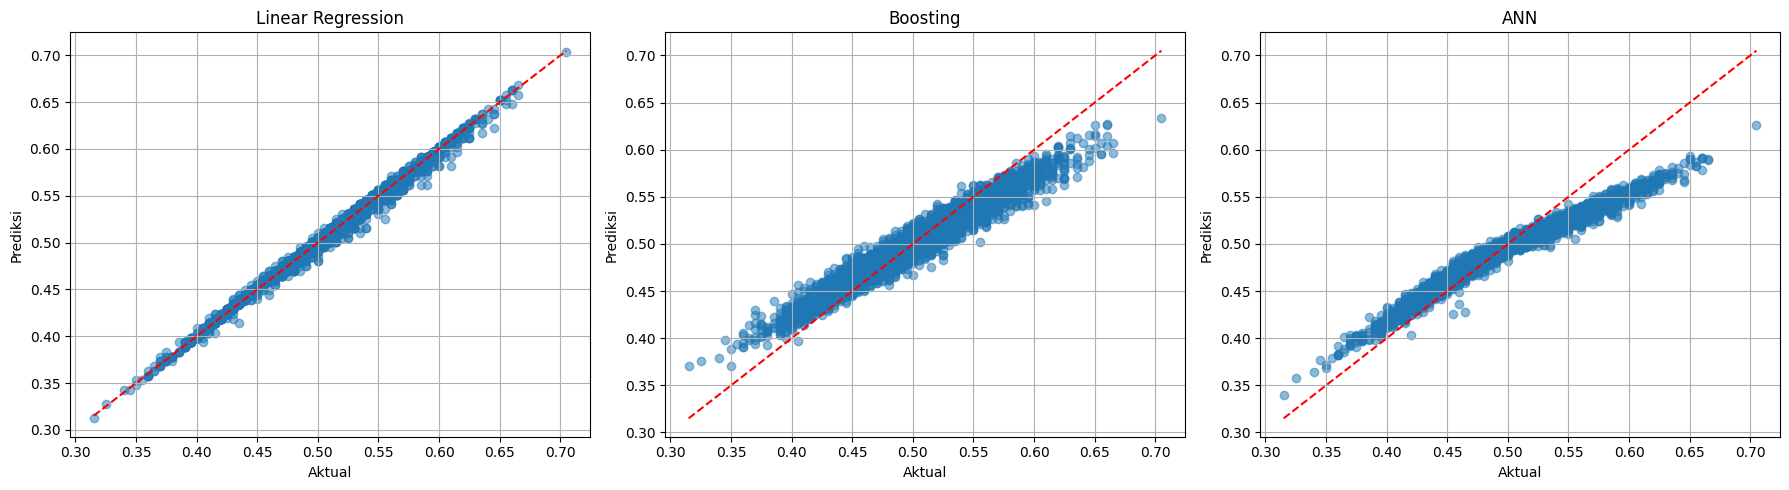

In [ ]:
# Prediksi masing-masing model
y_pred_lr = lr_model.predict(X_test)
y_pred_boost = gb_model.predict(X_test)
y_pred_ann = ann_model.predict(X_test).flatten()

# Plot
plt.figure(figsize=(18, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.grid(True)

# Boosting
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_boost, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Boosting")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.grid(True)

# ANN
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ann, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("ANN")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.grid(True)

plt.tight_layout()
plt.show()

**Kesimpulan Evaluasi Model**

Berdasarkan hasil MSE, RMSE, dan R²:

1. Linear Regression (LR):
  - Nilai MSE sangat kecil (1.12e-05), RMSE juga kecil (0.00334), dan R² sangat tinggi (0.9955), menunjukkan bahwa model ini mampu menangkap pola data dengan sangat baik.
  - Pada scatter plot, titik-titik prediksi hampir seluruhnya menempel di garis merah (garis ideal).
  - Model ini paling akurat dan stabil dibandingkan model lain.

2. Gradient Boosting Regressor (GBR):
  - MSE sebesar 0.00024, RMSE 0.0155, dan R² 0.9028, menunjukkan bahwa prediksi masih cukup akurat tetapi lebih menyebar dibandingkan linear regression.
  - Pada scatter plot, prediksi mulai terlihat tersebar di sekitar garis merah.
  - Model ini memiliki performa yang lebih rendah dibandingkan model lain.

3. Artificial Neural Network (ANN):
  - Semua fungsi aktivasi (relu, tanh, leaky_relu) menghasilkan nilai MSE: 0.000368, RMSE: 0.0192, dan R²: 0.8515, menunjukkan kinerja yang stabil tetapi lebih lemah dibanding dua model sebelumnya.
  - Scatter plot ANN menunjukkan prediksi yang lebih menyebar dari garis ideal dibandingkan GBR dan Linear Regression.
  - ANN menunjukkan performa yang baik, meskipun tidak mengungguli Linear Regression.

## Kesimpulan

**Kesimpulan Akhir**:

- Semua model (Linear Regression, ANN, dan Boosting) menunjukkan kesalahan prediksi yang rendah dan stabil antara data training dan testing. Artinya tidak terjadi overfitting.

- Linear Regression punya performa terbaik dengan MSE terkecil (1.12e-05), RMSE terkecil (0.00334), dan R² tertinggi (0.9955).

- Perbedaan performa antar model relatif kecil, namun Linear Regression secara konsisten lebih unggul.

- Berdasarkan evaluasi MSE, RMSE, dan R², Linear Regression dipilih sebagai model terbaik untuk kasus prediksi banjir ini.